In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU, Activation, Conv1D, MaxPooling1D, Dropout
from keras.regularizers import l2
from keras.layers import concatenate
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd


In [2]:
max_features = 15000  # обмежимо словник до 15 000 слів
maxlen = 300  # обмежимо довжину рецензії до 130 слів

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Розділімо дані на тренувальну, валідаційну та тестову вибірки
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
val_data = sequence.pad_sequences(val_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

17464789/17464789 [==============================] - 2s 0us/step


#Проста рекурентна мережа (SimpleRNN):

In [3]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32, input_length =len(train_data[0])))
model_rnn.add(SimpleRNN(16, input_shape = (max_features, maxlen), return_sequences=False, activation="relu", kernel_regularizer=l2(0.1)))
model_rnn.add(Dense(1))
model_rnn.add(Activation("sigmoid"))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
history = model_rnn.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(val_data, val_labels))

scores = model_rnn.evaluate(test_data, test_labels)
print(f'Точність на тестових даних: {scores[1]*100:.2f}%')

Epoch 1/10
137/137 [==============================] - 87s 568ms/step - loss: 1.8197 - accuracy: 0.5765 - val_loss: 1.2194 - val_accuracy: 0.5784
Epoch 2/10
137/137 [==============================] - 65s 478ms/step - loss: 0.8970 - accuracy: 0.7347 - val_loss: 0.9258 - val_accuracy: 0.4983
Epoch 3/10
137/137 [==============================] - 59s 434ms/step - loss: 0.7302 - accuracy: 0.6353 - val_loss: 0.6867 - val_accuracy: 0.6561
Epoch 4/10
137/137 [==============================] - 53s 388ms/step - loss: 0.6145 - accuracy: 0.7584 - val_loss: 0.5529 - val_accuracy: 0.7952
Epoch 5/10
137/137 [==============================] - 52s 379ms/step - loss: 0.4677 - accuracy: 0.8297 - val_loss: 0.5353 - val_accuracy: 0.7817
Epoch 6/10
137/137 [==============================] - 50s 364ms/step - loss: 0.3814 - accuracy: 0.8699 - val_loss: 0.4639 - val_accuracy: 0.8173
Epoch 7/10
137/137 [==============================] - 48s 352ms/step - loss: 0.3669 - accuracy: 0.8728 - val_loss: 0.5976 - val_ac

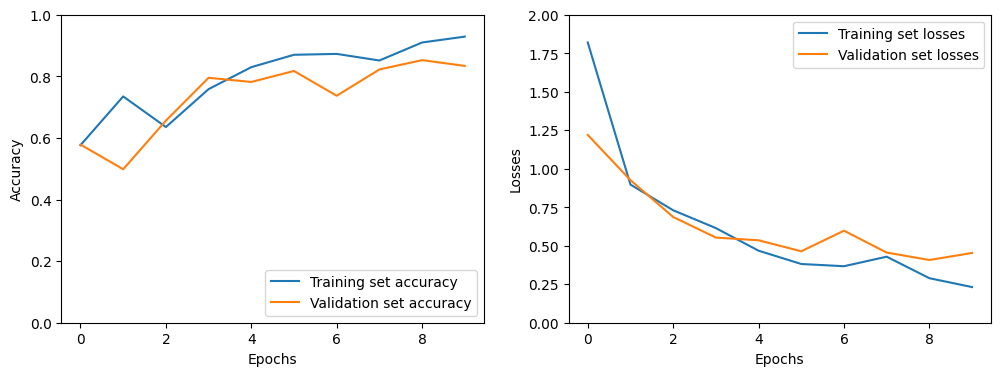

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation set accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training set losses')
plt.plot(history.history['val_loss'], label = 'Validation set losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()

In [6]:
preds = model_rnn.predict(test_data)
preds = pd.DataFrame(preds, columns=["pred"])
print(classification_report(test_labels, preds.pred.round().values))

782/782 [==============================] - 21s 27ms/step
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     12500
           1       0.91      0.72      0.80     12500

    accuracy                           0.82     25000
   macro avg       0.84      0.82      0.82     25000
weighted avg       0.84      0.82      0.82     25000



#LSTM (Long Short-Term Memory):

In [7]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length =len(train_data[0])))
model_lstm.add(LSTM(32, kernel_regularizer=l2(0.01)))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model_lstm.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(val_data, val_labels))

scores = model_lstm.evaluate(test_data, test_labels)
print(f'Точність на тестових даних: {scores[1]*100:.2f}%')

Epoch 1/10
137/137 [==============================] - 26s 164ms/step - loss: 0.7722 - accuracy: 0.7055 - val_loss: 0.4558 - val_accuracy: 0.8443
Epoch 2/10
137/137 [==============================] - 19s 137ms/step - loss: 0.3221 - accuracy: 0.8915 - val_loss: 0.3338 - val_accuracy: 0.8744
Epoch 3/10
137/137 [==============================] - 14s 98ms/step - loss: 0.2129 - accuracy: 0.9347 - val_loss: 0.3507 - val_accuracy: 0.8661
Epoch 4/10
137/137 [==============================] - 13s 93ms/step - loss: 0.1597 - accuracy: 0.9538 - val_loss: 0.3480 - val_accuracy: 0.8733
Epoch 5/10
137/137 [==============================] - 11s 79ms/step - loss: 0.1490 - accuracy: 0.9573 - val_loss: 0.3620 - val_accuracy: 0.8613
Epoch 6/10
137/137 [==============================] - 10s 71ms/step - loss: 0.1030 - accuracy: 0.9757 - val_loss: 0.3951 - val_accuracy: 0.8731
Epoch 7/10
137/137 [==============================] - 6s 41ms/step - loss: 0.0774 - accuracy: 0.9833 - val_loss: 0.4096 - val_accuracy

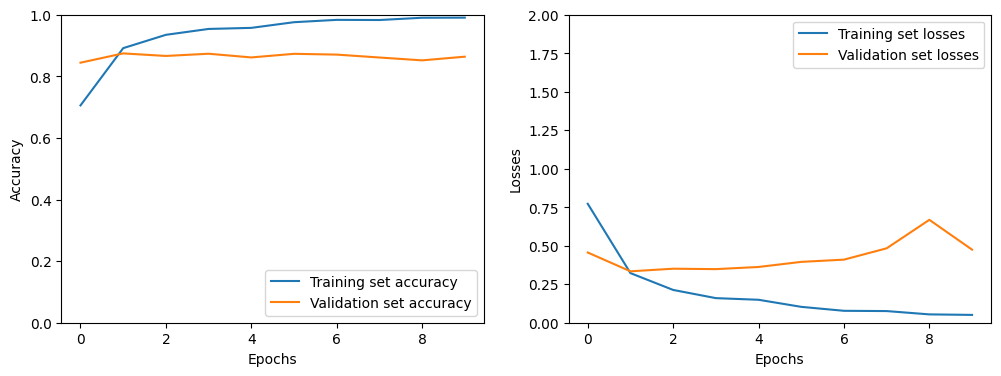

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation set accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training set losses')
plt.plot(history.history['val_loss'], label = 'Validation set losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()

In [10]:
preds = model_lstm.predict(test_data)
preds = pd.DataFrame(preds, columns=["pred"])
print(classification_report(test_labels, preds.pred.round().values))

782/782 [==============================] - 5s 5ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.84     12500
           1       0.83      0.86      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



#Двостороння рекурентна мережа (Bidirectional LSTM):

In [11]:
model_bi = Sequential()
model_bi.add(Embedding(max_features, 32, input_length =len(train_data[0])))
model_bi.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.01))))
model_bi.add(Dense(1, activation='sigmoid'))

model_bi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model_bi.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(val_data, val_labels))

scores = model_bi.evaluate(test_data, test_labels)
print(f'Точність на тестових даних: {scores[1]*100:.2f}%')

Epoch 1/10
137/137 [==============================] - 28s 177ms/step - loss: 1.0591 - accuracy: 0.6280 - val_loss: 0.6478 - val_accuracy: 0.7621
Epoch 2/10
137/137 [==============================] - 17s 122ms/step - loss: 0.6158 - accuracy: 0.7257 - val_loss: 0.5903 - val_accuracy: 0.8115
Epoch 3/10
137/137 [==============================] - 15s 106ms/step - loss: 0.4017 - accuracy: 0.8641 - val_loss: 0.3734 - val_accuracy: 0.8588
Epoch 4/10
137/137 [==============================] - 11s 84ms/step - loss: 0.2753 - accuracy: 0.9113 - val_loss: 0.3711 - val_accuracy: 0.8657
Epoch 5/10
137/137 [==============================] - 12s 90ms/step - loss: 0.2060 - accuracy: 0.9439 - val_loss: 0.3334 - val_accuracy: 0.8771
Epoch 6/10
137/137 [==============================] - 8s 60ms/step - loss: 0.1632 - accuracy: 0.9580 - val_loss: 0.3725 - val_accuracy: 0.8695
Epoch 7/10
137/137 [==============================] - 8s 61ms/step - loss: 0.1336 - accuracy: 0.9694 - val_loss: 0.3698 - val_accuracy

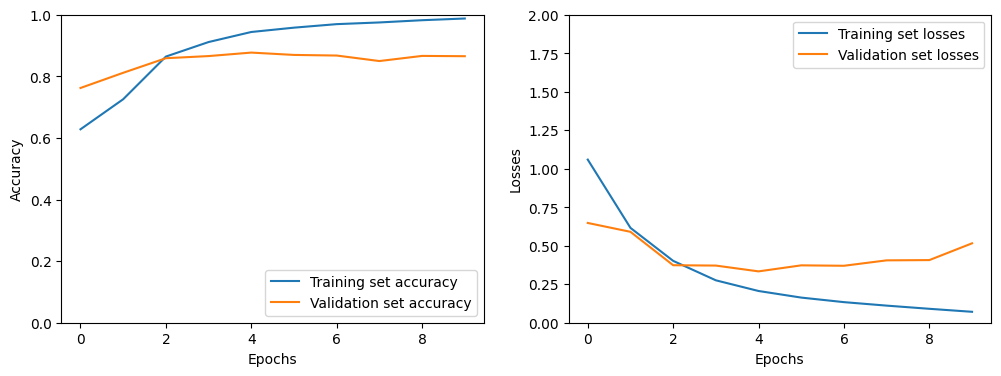

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation set accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training set losses')
plt.plot(history.history['val_loss'], label = 'Validation set losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()

In [14]:
preds = model_bi.predict(test_data)
preds = pd.DataFrame(preds, columns=["pred"])
print(classification_report(test_labels, preds.pred.round().values))

782/782 [==============================] - 8s 10ms/step
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     12500
           1       0.84      0.86      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



#Глибока рекурентна мережа:

In [15]:
model_dp = Sequential()
model_dp.add(Embedding(max_features, 32, input_length =len(train_data[0])))
model_dp.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))
model_dp.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))
model_dp.add(LSTM(32, kernel_regularizer=l2(0.01)))
model_dp.add(Dense(1, activation='sigmoid'))

model_dp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model_dp.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(val_data, val_labels))

scores = model_dp.evaluate(test_data, test_labels)
print(f'Точність на тестових даних: {scores[1]*100:.2f}%')

Epoch 1/10
137/137 [==============================] - 33s 201ms/step - loss: 1.3189 - accuracy: 0.7194 - val_loss: 0.5296 - val_accuracy: 0.8248
Epoch 2/10
137/137 [==============================] - 21s 156ms/step - loss: 0.3341 - accuracy: 0.8937 - val_loss: 0.3667 - val_accuracy: 0.8599
Epoch 3/10
137/137 [==============================] - 18s 131ms/step - loss: 0.2354 - accuracy: 0.9282 - val_loss: 0.3860 - val_accuracy: 0.8601
Epoch 4/10
137/137 [==============================] - 14s 100ms/step - loss: 0.1765 - accuracy: 0.9505 - val_loss: 0.4166 - val_accuracy: 0.8524
Epoch 5/10
137/137 [==============================] - 14s 99ms/step - loss: 0.1440 - accuracy: 0.9625 - val_loss: 0.4135 - val_accuracy: 0.8336
Epoch 6/10
137/137 [==============================] - 12s 86ms/step - loss: 0.1400 - accuracy: 0.9629 - val_loss: 0.4194 - val_accuracy: 0.8500
Epoch 7/10
137/137 [==============================] - 10s 74ms/step - loss: 0.1049 - accuracy: 0.9757 - val_loss: 0.5151 - val_accur

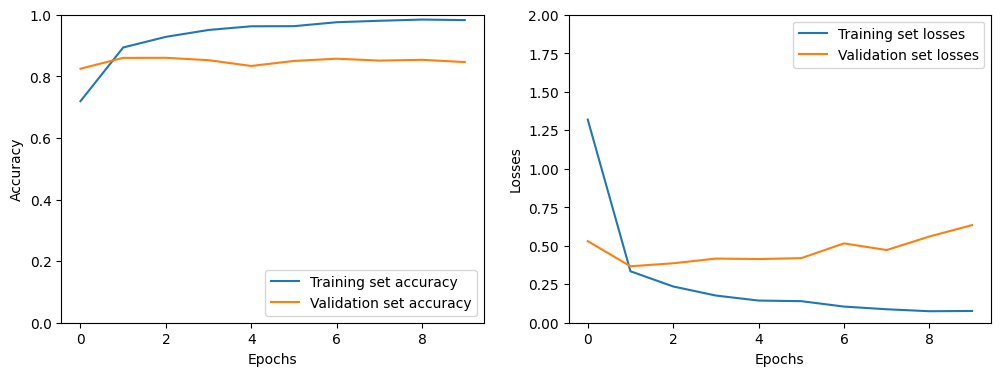

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation set accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training set losses')
plt.plot(history.history['val_loss'], label = 'Validation set losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()

In [18]:
preds = model_dp.predict(test_data)
preds = pd.DataFrame(preds, columns=["pred"])
print(classification_report(test_labels, preds.pred.round().values))

782/782 [==============================] - 12s 14ms/step
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



#Поєднання різних шарів:

In [19]:
# Створення моделі SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32, input_length =len(train_data[0])))
model.add(Conv1D(filters=128, kernel_size=7, activation="relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(LSTM(64, kernel_regularizer=l2(0.1), recurrent_regularizer=l2(0.1)))


# model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.1), recurrent_regularizer=l2(0.1))))

# model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.1)))
# model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.1)))
# model.add(LSTM(32, kernel_regularizer=l2(0.1)))

# model.add(SimpleRNN(64, input_shape=(max_features, maxlen), return_sequences=False, activation="relu", kernel_regularizer=l2(0.1)))

model.add(Dropout(0.3))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 32)           480000    
                                                                 
 conv1d (Conv1D)             (None, 294, 128)          28800     
                                                                 
 max_pooling1d (MaxPooling1  (None, 147, 128)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 147, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [21]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(val_data, val_labels))

scores = model.evaluate(test_data, test_labels)
print(f'Точність на тестових даних: {scores[1]*100:.2f}%')

Epoch 1/10
137/137 [==============================] - 30s 161ms/step - loss: 6.8103 - accuracy: 0.6555 - val_loss: 0.8748 - val_accuracy: 0.8040
Epoch 2/10
137/137 [==============================] - 18s 130ms/step - loss: 0.4626 - accuracy: 0.8692 - val_loss: 0.4305 - val_accuracy: 0.8411
Epoch 3/10
137/137 [==============================] - 13s 96ms/step - loss: 0.2475 - accuracy: 0.9310 - val_loss: 0.4187 - val_accuracy: 0.8485
Epoch 4/10
137/137 [==============================] - 13s 94ms/step - loss: 0.1730 - accuracy: 0.9583 - val_loss: 0.4742 - val_accuracy: 0.8501
Epoch 5/10
137/137 [==============================] - 9s 64ms/step - loss: 0.1131 - accuracy: 0.9801 - val_loss: 0.5577 - val_accuracy: 0.8545
Epoch 6/10
137/137 [==============================] - 8s 58ms/step - loss: 0.0702 - accuracy: 0.9918 - val_loss: 0.7545 - val_accuracy: 0.8631
Epoch 7/10
137/137 [==============================] - 6s 47ms/step - loss: 0.0576 - accuracy: 0.9933 - val_loss: 0.8015 - val_accuracy: 

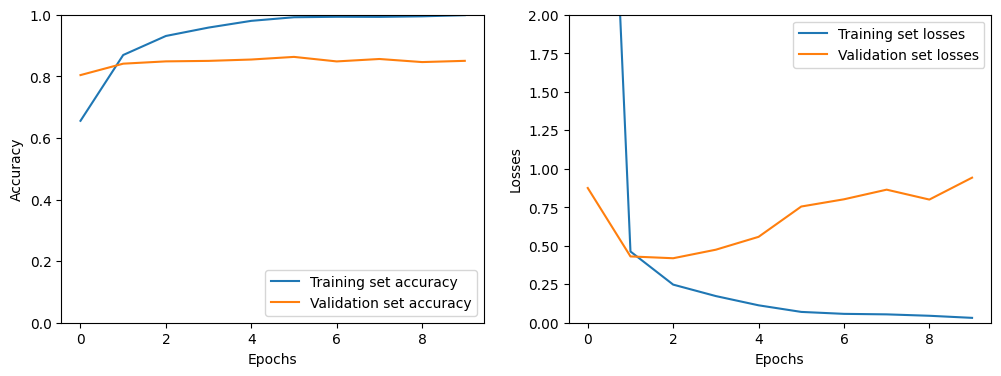

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation set accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training set losses')
plt.plot(history.history['val_loss'], label = 'Validation set losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()

In [23]:
preds = model.predict(test_data)
preds = pd.DataFrame(preds, columns=["pred"])
print(classification_report(test_labels, preds.pred.round().values))

782/782 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     12500
           1       0.84      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

